# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 5, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Karin Brinksma 13919938 Dominique Weltevreden 12161160

# The global keyword (helpful info for exercise 2)
In exercise 2 you are asked, at some point, to count the number of times a certain function is evaluated. One way of doing this is using a global variable. To change a global variable x from inside a function, the global keyword is used.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# to change a global variable x from inside a function, use the global keyword
def foo():
    global x
    x = x*2
    
x=4
print("x before:", x) 
foo()
print("x after:", x)

# verify for yourself that omitting the line "global x" produces an error

x before: 4
x after: 8


-----
# Exercise 1 (exercise 6.6(d), 2.5 pts)
**N.B. This is a pen-and-paper exercise. If you prefer you may upload a separate pdf for this exercise and other pen-and-paper exercises. If you do, don't put both files in a single .zip file, upload them both separately.**

Consider the minimization of 
$$
  f(x,y) = x^2 + y^2
$$
subject to
$$
  g(x,y) = xy^2 -1 = 0 .
$$
Determine the critical points of the Lagrangian function for this problem and determine whether each is a constrained minimum, a constrained maximum, or neither.

The critical points are
$$
    x = 2 ^\frac{-1}{3} , y = \pm 2 ^ \frac{1}{6}, \lambda = - 2 ^ \frac{1}{3}
$$

It is neither a constrained minimum nor a maximum. Please refer to the pen-and-paper solution.

---
# Exercise 2

## (a) (1 point)
The Rosenbrock function is given by

$$
f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

What is the gradient of $f$? Show that there is exactly one local minimum point and determine this point (N.B. this is a pen-and-paper exercise.)

The gradient of $f$ is 
$\left[ \begin{array}{ccc}
400(x^3 - xy) + 2x - 2\\
200 (y - x^2) \\ \end{array} \right].\ $

The global minimum is (1, 1).

Please refer to the pen-and-paper solution.

## (b) (2 points)
Implement the method of steepest descent. Use `scipy.optimize.line_search` as line search method.

Test your method on the Rosenbrock function starting from $(x,y) = (0,0)$.
Plot the convergence to the minimum: Make a plot of the convergence in the $(x,y)$ plane as well as plot of the norm of the error as a function of the step number.


In [68]:
gradient_counter = 0
function_counter = 0

29


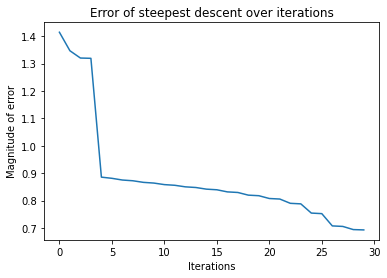

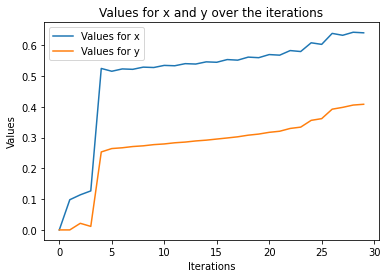

In [89]:
# Algorithm 6.3
def rosenbrock(initial):
    """
    Calculate the Rosenbrock function with a = 1 and b = 100
    Input:
    initial = (2,) Array for x and y values
    
    Returns:
    Value for f
    """
    global function_counter
    function_counter += 1
    
    return 100 * (initial[1] - initial[0] ** 2) ** 2 + (1 - initial[0] ** 2)

def rosenbrock_gradient(initial):
    """
    Calculate the gradient of the Rosenbrock function.
    Input:
    initial = (2,) Array for x and y values
    
    Returns:
    List of derivative of x and derivative over y
    """
    global gradient_counter
    gradient_counter += 1
    
    return [400 * (initial[0] ** 3 -  initial[0] * initial[1]) + (2 * initial[0]) - 2,
            200 * (initial[1] - initial[0] ** 2)]

def steepest_descent(initial, k):
    """
    Steepest descent for multidimensional optimisation, based on Algorithm 6.3 from Ch6 of Scientific Computing.
    Input:
    initial = (2,) Array for x and y values
    k       = iterations to loop over
    
    Returns:
    x_values   = list of values for x in every loop
    y_values   = list of values for y in every loop
    error_list = list of error value in every loop
    k          = number of iterations that actually happened (due to break statements)
    
    """
    # We know the true minimum is 1, 1 as per a
    true_minimum = np.array([1,1])
    
    # Make a list of X and Y  and error values for plotting purposes
    x_values = [initial[0]]
    y_values = [initial[1]]
    
    # Calculate initial error as well
    error_list = [np.linalg.norm(initial - true_minimum)]
    

    # Allow k iterations of steepest descent, or until the line search does not converge anymore
    for i in range(k):
        
        # Compute the negative gradient
        
        s =  - np.array(rosenbrock_gradient(initial))
       
        # Find optimal a_k using line search; use negative gradient as search direction.
        
        a_k = scipy.optimize.line_search(rosenbrock, rosenbrock_gradient, initial, s, maxiter = 10000)[0]
         
            
        # If the line search doesn't converge, break the loop
        if not a_k:
            
            # Set the k to the current iteration for plotting purposes
            k = i
            break
    
        
        # Update the start values
        initial = initial + a_k * s
        
        # Calculate error by comparing current values to the true minimum
        error = np.linalg.norm(initial - np.array([1,1]))
        
        if error < 10**-5:
            # Set the k to the current iteration for plotting purposes
            k = i
            break
      
        # Append values to list for plotting purposes
        x_values.append(initial[0])
        y_values.append(initial[1])
        error_list.append(error)

    return x_values, y_values, error_list, k

guess = np.array([0, 0])
k = 40
xs, ys, errors, k = steepest_descent(guess, k)
print(k)

#PLOTTING
k_list = np.arange(k+1)
plt.plot(k_list, errors)
plt.title("Error of steepest descent over iterations")
plt.xlabel("Iterations")
plt.ylabel("Magnitude of error")
plt.show()

plt.plot
plt.plot(k_list, xs, label = "Values for x")
plt.plot(k_list, ys, label = "Values for y")
plt.legend()
plt.title("Values for x and y over the iterations")
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.show()

## (c) (1.5 points)

Implement the BFGS method for unconstrained optimization, given in Heath chapter 6. Test the correctness of the code using the data in Example 6.13.

In [103]:
def tryout_gradient(initial):
    # as per example 6.13; minimum at x1 and x2 0
    return [initial[0], 5 * initial[1]]

def BFGS(initial, B0, k, chosen_gradient = rosenbrock_gradient):
    """
    BFGS method for optimization of a function.
    
    Input:
    initial         = np.array of initial values for x and y of length n
    B0              = n x n matrix with the initial Hessian approximation; often given as identity matrix
    k               = number of iterations to optimize for
    chosen_gradient = gradient of the function f; must return list
    
    """
    n = np.shape(initial)[0]
    values = [initial]
    
    # We know the true minimum is 1, 1 as per a
    true_minimum = np.array([1,1])
    error_list = [np.linalg.norm(initial - true_minimum)]
    
    for i in range(k):
        
        # Implement this if statement for the gradient counter to work
        if chosen_gradient == rosenbrock_gradient:
            gradient =  -1 * np.array(rosenbrock_gradient(initial))
            
        else:
            gradient = -1 * np.array(chosen_gradient(initial))
            
        # Solve B @ s = gradient for s (quasi-Newton step)
        s = scipy.linalg.solve(B0, gradient)
        
        # Update the solution with this s
        initial = initial + s
        
        # Compute y_k by adding the gradient of the new solution and the old solution
        y_k = np.array(chosen_gradient(initial)) + gradient
        
        # Reshape y_k and s into a 2D array so they are transposable
        y_k = np.reshape(y_k, (n, 1))
        s = np.reshape(s, (n, 1))
        
        # Update approximate Hessian
        first_term = ((y_k @ y_k.T) / (y_k.T @ s))
        second_term = (((B0 @ s) @ s.T) @ B0) / ((s.T @ B0) @ s)
        B0 = B0 + first_term - second_term
        
        # Calculate error by comparing current values to the true minimum
        error = np.linalg.norm(initial - np.array([1,1]))
        
        # Stopping criterion if the model has converged
        if error < 10**-5:
            
            # For plotting purposes
            k = i
            break
            
        # Add the solution of this loop to the list
        values.append(initial)
        error_list.append(error)
    
    return values, error_list, B0, k


guess = np.array([5, 1])
n = np.shape(guess)[0]
hessian_guess = np.eye(n)
k = 30
value_list, errors, B, k = BFGS(guess, hessian_guess, k, tryout_gradient)
print(f"Check solution: {np.allclose(value_list[-1], [0,0])}")

Check solution: True


## (d) (1 points)

Apply your implementation of the BFGS method to find a local minimum of the Rosenbrock function (see previous exercise). Use starting point $(0,0)$ and do not assume any knowledge of the Hessian when you choose $B_0$.
Plot the convergence to the minimum.

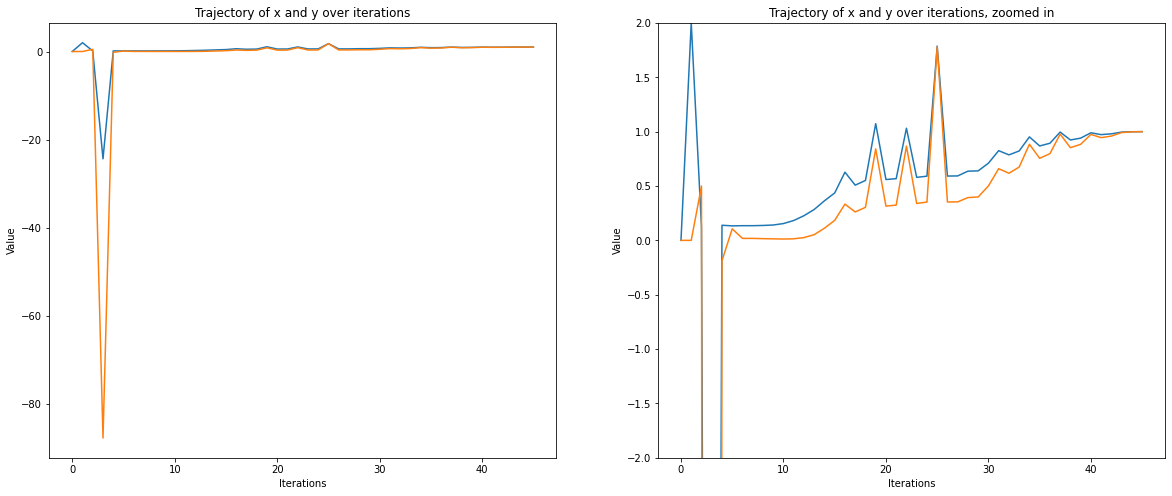

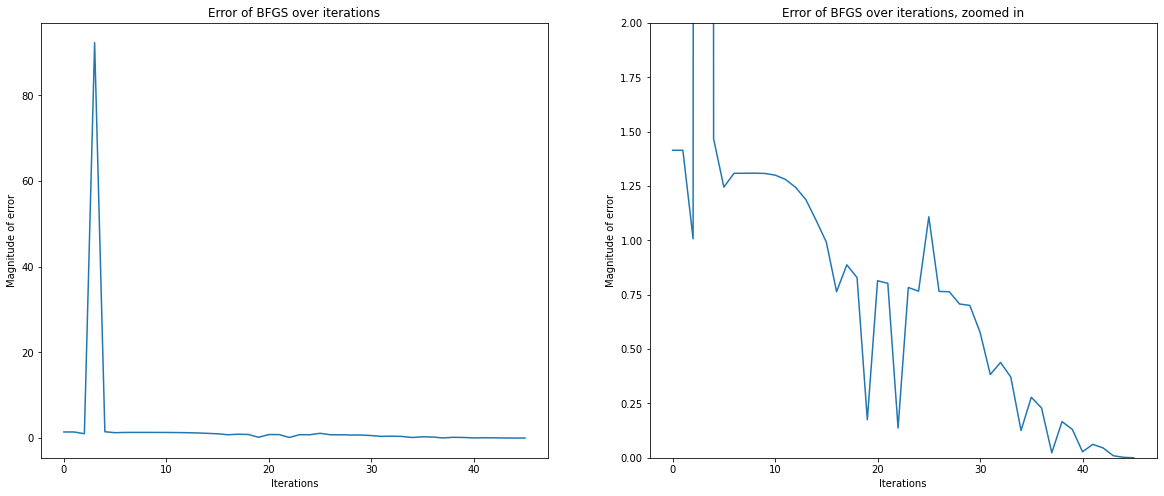

In [106]:
guess = np.array([0, 0])
n = np.shape(guess)[0]
hessian_guess = np.eye(n)
k = 50

value_list, errors, B, k = BFGS(guess, hessian_guess, k)
k_list = np.arange(k+1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(k_list, value_list)
plt.title("Trajectory of x and y over iterations")
plt.xlabel("Iterations")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.plot(k_list, value_list)
plt.title("Trajectory of x and y over iterations, zoomed in")
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.ylim(-2, 2)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(k_list, errors)
plt.title("Error of BFGS over iterations")
plt.xlabel("Iterations")
plt.ylabel("Magnitude of error")

plt.subplot(1, 2, 2)
plt.plot(k_list, errors)
plt.title("Error of BFGS over iterations, zoomed in")
plt.xlabel("Iterations")
plt.ylabel("Magnitude of error")
plt.ylim(0, 2)
plt.show()

## (e) (1 point)
How does the convergence compare to that of gradient descent (see
previous question)? Let your program count the number of function and gradient evaluations and
consider this in your comparison. Implement a stopping criterion in both methods that runs until $||x_k-x^*||_2 < 10^{-5}$.

In [91]:
# Initialize at 0 again
gradient_counter = 0
function_counter = 0

# Count for BFGS
guess = np.array([0, 0])
n = np.shape(guess)[0]
hessian_guess = np.eye(n)
k = 50

value_list, B, k = BFGS(guess, hessian_guess, k)

print("BFGS")
print(f"Converges at k: {k}")
print(f"The number of function evaluations in BFGS is : {function_counter}")
print(f"The number of gradient evaluations in BFGS is : {gradient_counter}")

# Initialize at 0 again
gradient_counter = 0
function_counter = 0

k = 50
xs, ys, errors, k = steepest_descent(guess, k)

print("Gradient descent")
print(f"Converges at k: {k}")
print(f"The number of function evaluations in steepest descent is : {function_counter}")
print(f"The number of gradient evaluations in steepest descent is : {gradient_counter}")

BFGS
Converges at k: 45
The number of function evaluations in BFGS is : 0
The number of gradient evaluations in BFGS is : 92
Gradient descent
Converges at k: 29
The number of function evaluations in steepest descent is : 229
The number of gradient evaluations in steepest descent is : 93


Looking at our results, it seems that the steepest descent gets stuck in some sort of local minimum. The gradient becomes zero at k = 29, in which the line search does not converge anymore and it is thus not possible to continue with the gradient descent. Therefore, there remains a high error, as the values for x and y do not approach 1, but remain stuck around 0.4 and 0.6. Furthermore, the steepest descent algorithm uses a high number of function and gradient evaluations, indicating low computational efficiency. If we look at the literature, we see that the convergence rate of steepest descent is linear (Heath, 2002, p276). 

The BFGS method performs a lot better, nearing the true solution and scoring a low error, even if it does take more iteration to get there. But, as the number of function evaluations in this method is 0 and the number of gradient evaluations is lower than in steepest descent, this method might still be more efficient. The convergence rate of BFGS is superlinear (Heath, 2002, p281), which seems to be visible in the error graph. The theory states that the BFGS method should converge in at most n iterations, with n being the dimension of the problem. 


